In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re


import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


Texas_quality = pd.read_csv("Texas_Qualitylife.csv")

In this code block we extracted Texas counties from the dataset.

In [2]:
quality_Texas = Texas_quality[Texas_quality['LSTATE'].str.contains('TX', case=False, na=False)]
quality_Texas['ULOCALE'].unique()

quality_Texas

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
1,TXMcmullen County,TX,McMullen County,48311,78072,43-Rural: Remote,NaN,576,47/1000,1.81%,...,105.46%,111.95%,72.03%,90.73%,104.21%,120.05%,127.11%,3,2,87
2,TXTerrell County,TX,Terrell County,48443,79848,43-Rural: Remote,NaN,693,20/1000,3.54%,...,127.10%,135.84%,87.96%,110.73%,125.11%,145.91%,153.79%,12,3,47
7,TXCochran County,TX,Cochran County,48079,79379,43-Rural: Remote,NaN,"2,526",33/1000,5.08%,...,112.29%,121.64%,79.03%,99.96%,114.19%,131.65%,140.54%,41,8,135
8,TXArmstrong County,TX,Armstrong County,48011,79019,42-Rural: Distant,NaN,"1,850",7/1000,2.85%,...,103.99%,110.78%,63.85%,85.75%,98.54%,116.02%,122.96%,16,9,28
9,TXDelta County,TX,Delta County,48119,75469,43-Rural: Remote,NaN,"5,406",6/1000,4.18%,...,108.26%,115.55%,74.63%,94.65%,107.74%,125.03%,132.93%,349,10,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,TXTarrant County,TX,Tarrant County,48439,76118,21-Suburb: Large,NaN,"2,154,595",30/1000,3.74%,...,103.15%,108.74%,62.17%,83.12%,95.65%,113.37%,120.02%,3036,3120,3125
3122,TXBexar County,TX,Bexar County,48029,78109,21-Suburb: Large,NaN,"2,059,530",50/1000,3.84%,...,109.29%,115.61%,66.44%,90.25%,104.20%,122.00%,128.41%,3035,3123,3122
3123,TXHidalgo County,TX,Hidalgo County,48215,78539,12-City: Mid-size,NaN,"888,367",30/1000,6.93%,...,138.74%,148.26%,90.28%,119.83%,138.05%,160.55%,169.30%,3020,3124,3104
3124,TXDallas County,TX,Dallas County,48113,75146,41-Rural: Fringe,NaN,"2,600,840",36/1000,3.85%,...,121.22%,128.02%,73.80%,98.57%,113.73%,133.57%,141.59%,3041,3125,3129


In the block below we identified our 8 features we wanted to use, and adjusted the the rows within the columns of interest to remove any dollar signs or other things that would make the data show up as strings.

In [3]:
features = [
    'Cost of Living',
    'Unemployment',
    '2022 Median Income',
    'WaterQualityVPV',
    'Crime Rate',
    'Diversity Rank (Race)',
    'Diversity Rank (Gender)',
    'ULOCALE'
]

quality_Texas['Cost of Living'] = quality_Texas['Cost of Living'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['2022 Median Income'] = quality_Texas['2022 Median Income'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['Unemployment'] = quality_Texas['Unemployment'].replace({r'[,\%]': ''}, regex=True).astype(float)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.replace(r'[\d\-]+', '', regex=True)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.strip()
quality_Texas['Crime Rate'] = quality_Texas['2016 Crime Rate'].str.extract(r'(\d+)').astype(float)


X = quality_Texas[features]


X


,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Crime Rate,Diversity Rank (Race),Diversity Rank (Gender),ULOCALE
1,63913.28,1.81,67513.81,2,47.0,2,87,Rural: Remote
2,64361.02,3.54,55946.62,3,20.0,3,47,Rural: Remote
7,61721.15,5.08,59858.82,4,33.0,8,135,Rural: Remote
8,73725.97,2.85,81611.11,1,7.0,9,28,Rural: Distant
9,62084.03,4.18,63549.24,-1,6.0,10,454,Rural: Remote
...,...,...,...,...,...,...,...,...
3119,72592.42,3.74,82001.30,5,30.0,3120,3125,Suburb: Large
3122,66248.04,3.84,69862.16,1,50.0,3123,3122,Suburb: Large
3123,56645.44,6.93,45446.29,13,30.0,3124,3104,City: Midsize
3124,72227.78,3.85,68960.61,1,36.0,3125,3129,Rural: Fringe


In [4]:
X['ULOCALE'].unique()

array(['Rural: Remote', 'Rural: Distant', 'Town: Remote', 'Town: Distant',
       'Rural: Fringe', 'Town: Fringe', 'Suburb: Large', 'City: Small',
       'Suburb: Midsize', 'City: Midsize', 'City: Large'], dtype=object)

In the block below we encoded our area classification data (rural, suburban, etc) so that more urban areas are represented by larger numbers and are therefore more favorable to postgrads. It essentially represents walkability since we are assuming that postgrads would find this more favorable.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


location = ['Rural: Remote', 'Rural: Distant', 'Rural: Fringe', 'Town: Remote', 'Town: Distant', 'Town: Fringe', 'Suburb: Midsize', 'Suburb: Large', 'City: Small', 'City: Midsize', 'City: Large']
ord_features = ['ULOCALE']
ordEnc = OrdinalEncoder(categories = [location])

ordinal_encoder = OrdinalEncoder()

coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordinal_encoder, ord_features),   
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(X)


new_feature_names = coltrans.get_feature_names_out()

Texas_encoded = pd.DataFrame(X_trans, columns = new_feature_names)
Texas_encoded


,ULOCALE,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Crime Rate,Diversity Rank (Race),Diversity Rank (Gender)
0,5.0,63913.28,1.81,67513.81,2.0,47.0,2.0,87.0
1,5.0,64361.02,3.54,55946.62,3.0,20.0,3.0,47.0
2,5.0,61721.15,5.08,59858.82,4.0,33.0,8.0,135.0
3,3.0,73725.97,2.85,81611.11,1.0,7.0,9.0,28.0
4,5.0,62084.03,4.18,63549.24,-1.0,6.0,10.0,454.0
...,...,...,...,...,...,...,...,...
248,6.0,72592.42,3.74,82001.30,5.0,30.0,3120.0,3125.0
249,6.0,66248.04,3.84,69862.16,1.0,50.0,3123.0,3122.0
250,1.0,56645.44,6.93,45446.29,13.0,30.0,3124.0,3104.0
251,4.0,72227.78,3.85,68960.61,1.0,36.0,3125.0,3129.0


# Feature Engineering

In the block below, we made a new variable including the updated features and adjusted them so that higher numbers represent favorability with respect to all 7 features. We then scaled the features to ensure they have the same weight and that larger scale numbers don't disproportionally affect the results.

In [6]:
X_living = Texas_encoded[features].copy()

X_living['Diversity Rank (Gender)'] = -X_living['Diversity Rank (Gender)']
X_living['Diversity Rank (Race)'] = -X_living['Diversity Rank (Race)']

X = X_living[features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)


In the 3 code blocks below we fit and plotted a pca and included the same amount of components as features. We then took a look at which features influence the components the most/least.

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X_scaled)

pca.components_

array([[-0.46225814,  0.08778709, -0.42170002,  0.07932746, -0.21602742,
         0.5082807 ,  0.51605792,  0.15216502],
       [-0.34674886,  0.55571466, -0.41630433, -0.00537865,  0.44792725,
        -0.31247863, -0.28737054,  0.12940123],
       [-0.06467523, -0.17815204, -0.09387825,  0.86357219,  0.19050442,
        -0.01880931, -0.01631488, -0.41544796],
       [ 0.07291613, -0.1567424 ,  0.12154795,  0.40289206,  0.03230953,
        -0.07022331, -0.04912535,  0.88579378],
       [-0.13389832, -0.54001971, -0.01042807, -0.26709785,  0.75421153,
         0.16346242,  0.14970769,  0.03213341],
       [ 0.3622864 ,  0.57484778,  0.38081608,  0.11636148,  0.38058341,
         0.32659939,  0.35808493, -0.00141406],
       [ 0.70937522, -0.06860367, -0.69024615, -0.02445758,  0.03910242,
        -0.01681142,  0.10837042,  0.03855702],
       [ 0.06472706,  0.01976337, -0.0608555 ,  0.01094739,  0.01223662,
         0.7106708 , -0.69716681,  0.01876971]])

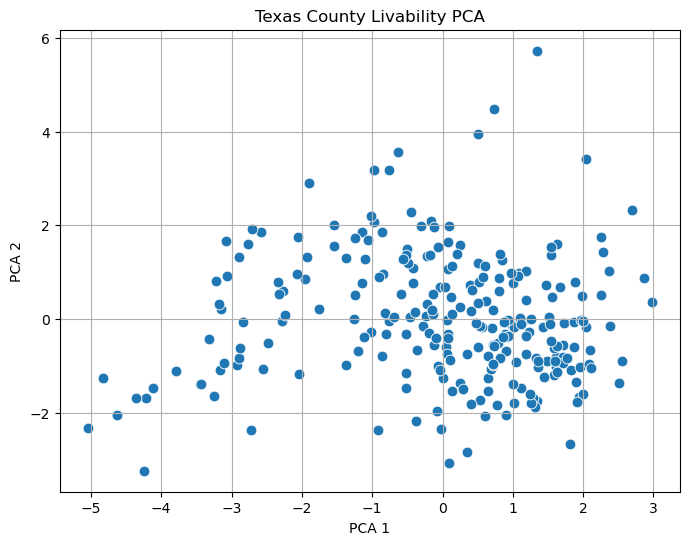

In [23]:
column_names = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(data=pca_data, columns=column_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=60)
plt.title('Texas County Livability PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

Below we created a dataframe that depicts the contribution of each feature to the eight principal components. This helps us understand what each component may represent. 

In [9]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
pca_components.index = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_components.T.sort_values(by='PC1', ascending=False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Diversity Rank (Gender),0.516058,-0.287371,-0.016315,-0.049125,0.149708,0.358085,0.108370,-0.697167
Diversity Rank (Race),0.508281,-0.312479,-0.018809,-0.070223,0.163462,0.326599,-0.016811,0.710671
ULOCALE,0.152165,0.129401,-0.415448,0.885794,0.032133,-0.001414,0.038557,0.018770
Unemployment,0.087787,0.555715,-0.178152,-0.156742,-0.540020,0.574848,-0.068604,0.019763
WaterQualityVPV,0.079327,-0.005379,0.863572,0.402892,-0.267098,0.116361,-0.024458,0.010947
Crime Rate,-0.216027,0.447927,0.190504,0.032310,0.754212,0.380583,0.039102,0.012237
2022 Median Income,-0.421700,-0.416304,-0.093878,0.121548,-0.010428,0.380816,-0.690246,-0.060856
Cost of Living,-0.462258,-0.346749,-0.064675,0.072916,-0.133898,0.362286,0.709375,0.064727


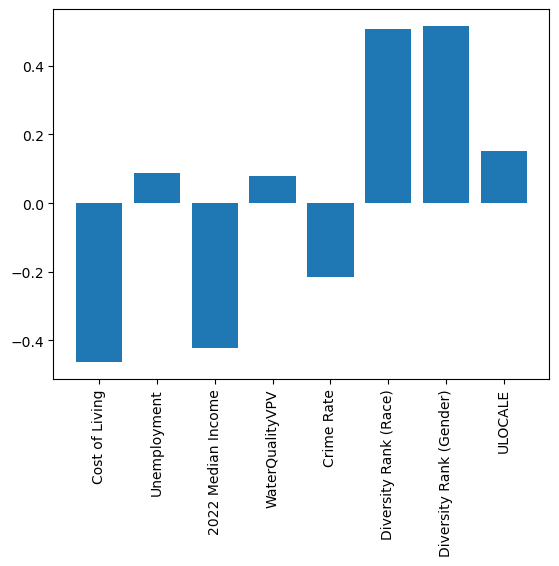

In [10]:
plt.bar(X.columns, pca.components_[0])
plt.xticks(rotation=90)
plt.show()

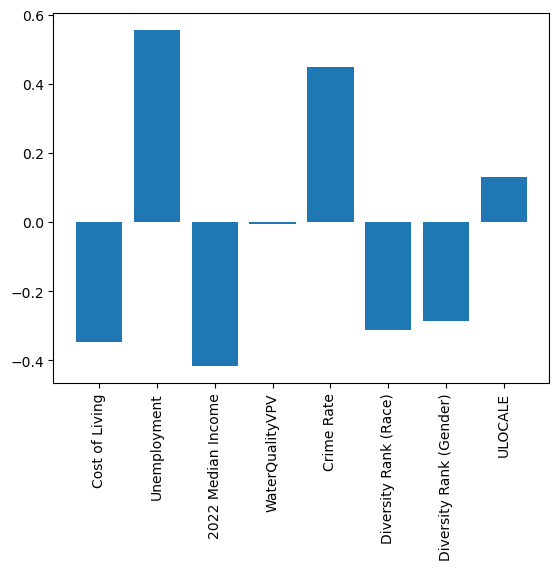

In [11]:
plt.bar(X.columns, pca.components_[1])
plt.xticks(rotation=90)
plt.show()

In the block below we tested some K-means models with different amounts of clusters to determine the ideal amount (best silhouette score). It ended up being ideal to just use 2 clusters.

c:\Users\jjoin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjoin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjoin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjoin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

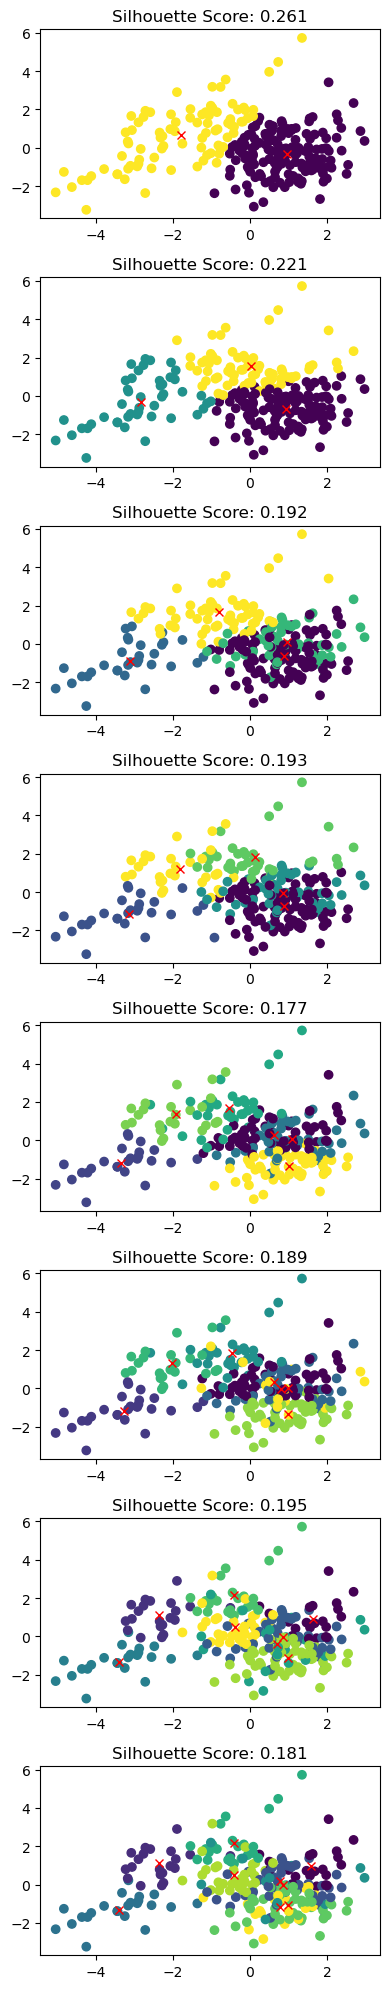

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

fig, ax = plt.subplots(len(n_clusters), 1, figsize=(4, 20))

for k, nc in enumerate(n_clusters):
    km = KMeans(n_clusters=nc, random_state=42)
    km.fit(pca_df)  
    labels = km.labels_
    centroids = km.cluster_centers_
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)
    
    ax[k].scatter(pca_df['PC1'], pca_df['PC2'], c=labels)
    ax[k].plot(centroids[:, 0], centroids[:, 1], 'rx')
    ax[k].set_title(f'Silhouette Score: {score:.3f}')
    
plt.tight_layout()
plt.show()

In the block below we plotted a K-means on the pca transformed data with 2 clusters.

c:\Users\jjoin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


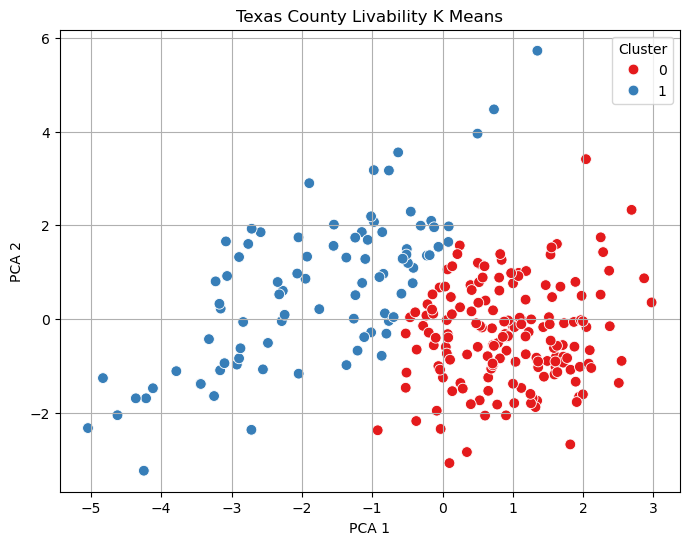

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('Texas County Livability K Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



The code below calculates the average values of each feature by cluster in order to better understand what makes each cluster distinct. Because locality is non-numeric, we calculated the mode.

In [ ]:
numeric_features = [col for col in features if pd.api.types.is_numeric_dtype(quality_Texas[col])]

cluster_summary = quality_Texas.groupby('Cluster').agg(
    {**{col: 'mean' for col in numeric_features}, 'ULOCALE': lambda x: x.mode()[0]}
)
cluster_summary

,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Crime Rate,Diversity Rank (Race),Diversity Rank (Gender),ULOCALE
Cluster,,,,,,,,
0,63070.430727,4.074606,62423.113636,3.436364,16.515152,671.830303,796.575758,Rural: Remote
1,68029.695000,4.426364,72400.944773,2.909091,26.784091,2446.795455,2485.227273,Town: Distant


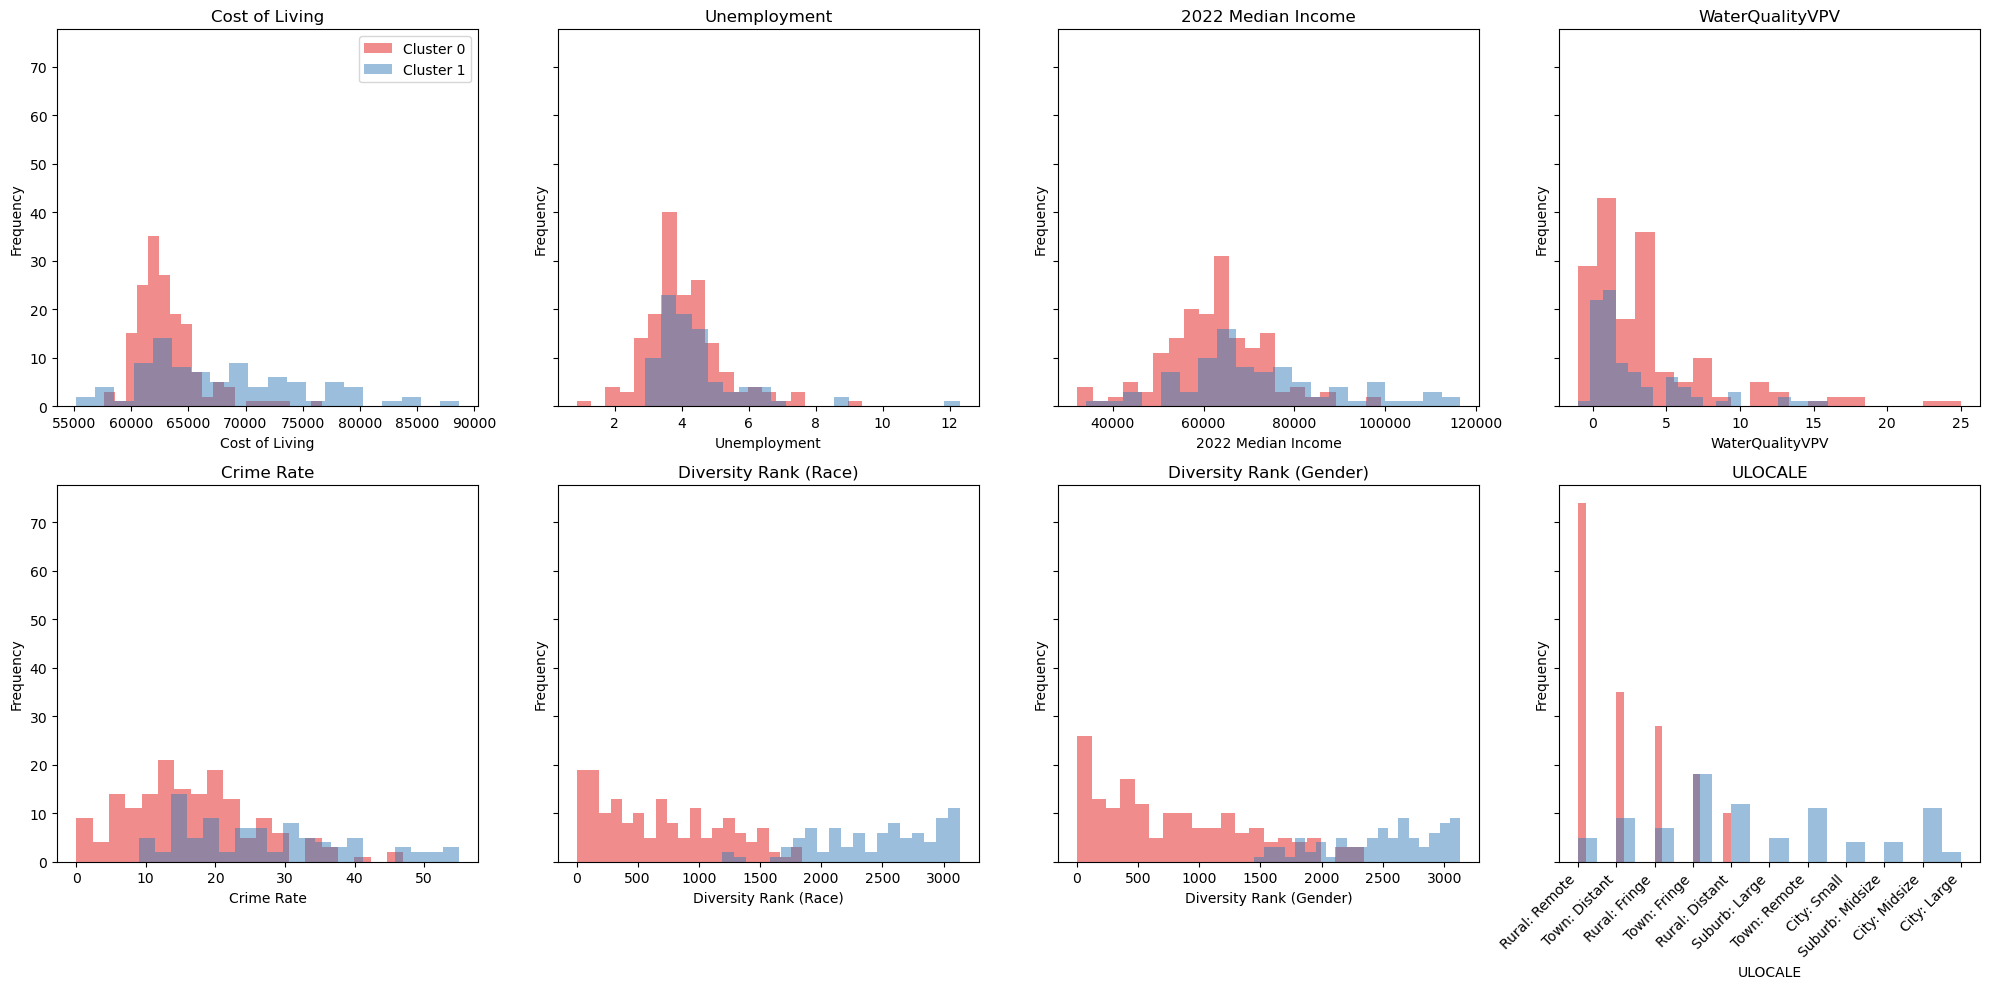

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(numeric_features+['ULOCALE']):
    ax = axes[i]
    for cluster in quality_Texas['Cluster'].unique():
        subset = quality_Texas[quality_Texas['Cluster'] == cluster]
        ax.hist(subset[feature], bins=20, alpha=0.5, label=f'Cluster {cluster}', color=sns.color_palette('Set1')[cluster])
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
    if feature == 'ULOCALE':
        ax.set_xticks(range(len(subset[feature].unique())))
        ax.set_xticklabels(subset[feature].unique(), rotation=45, ha='right')

    
axes[0].legend()

plt.tight_layout()
plt.show()

In the block below, we included an interactive visualization with county labels on each data point to enhance interpretability. 

In [16]:
import plotly.express as px
import pandas as pd

pca_df = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'County': quality_Texas['NMCNTY'],    
    'Cluster': kmeans.labels_
})

fig = px.scatter(
    pca_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    hover_data=['County'],   
    title='Texas Counties Interactive (PCA)',
    color_discrete_sequence=px.colors.qualitative.Set1[:len(pca_df['Cluster'].unique())]
)

fig.update_layout(width=950, height=750)  

fig.show()


Finally, we calculated a liveability score for each county based on their PCA-transformed values by the amount of variance explained by each of the components. 

In [17]:
pca_weights = pca.explained_variance_ratio_
quality_Texas['Score'] = pca_data.dot(pca_weights)

top_places = quality_Texas[['NMCNTY', 'Score']].sort_values(by='Score', ascending=False)
top_places.head(5)

,NMCNTY,Score
569,Dimmit County,1.650388
807,Brooks County,1.454177
510,Jim Hogg County,1.397572
31,Kenedy County,1.391737
2762,Starr County,1.298896
